# LeNet

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model



In [3]:
# ImageDataGenerator for data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory('datasets/train', target_size=(256, 256), batch_size=32, class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('datasets/test', target_size=(256, 256), batch_size=32, class_mode='categorical')



Found 1983 images belonging to 4 classes.
Found 2138 images belonging to 4 classes.


In [4]:
# LeNet-5 Model Implementation
model = models.Sequential()

# Layer 1: Convolutional Layer (C1)
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 2: Convolutional Layer (C2)
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3: Fully Connected Layer (C3) - Flatten the output of convolutional layers
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully Connected Layer (C4)
model.add(layers.Dense(84, activation='relu'))

# Output Layer: Softmax for classification
model.add(layers.Dense(len(training_set.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback for saving the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(training_set, epochs=1, validation_data=test_set, callbacks=[checkpoint])




62/62 [==============================] - ETA: 0s - loss: 1.3775 - accuracy: 0.3243
Epoch 1: accuracy improved from inf to 0.32426, saving model to best_model.h5
62/62 [==============================] - 197s 3s/step - loss: 1.3775 - accuracy: 0.3243 - val_loss: 1.3835 - val_accuracy: 0.3288


67/67 [==============================] - 40s 598ms/step - loss: 1.3835 - accuracy: 0.3288
Test accuracy: 32.88%


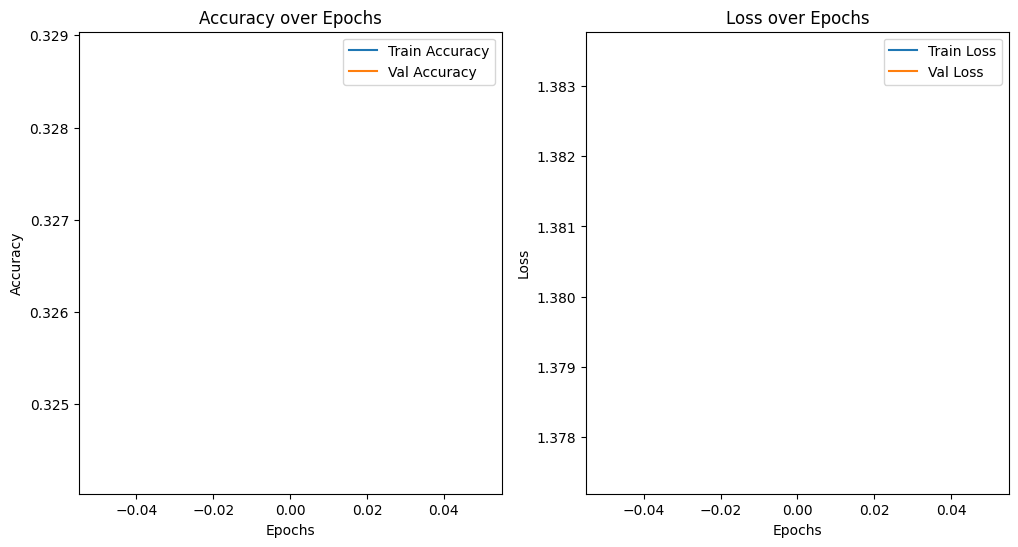

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_set)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

